# [Scene Recognition with Bag-of-Words](https://www.cc.gatech.edu/~hays/compvision/proj4/)
For this project, you will need to report performance for three
combinations of features / classifiers. It is suggested you code them in
this order, as well:
1. Tiny image features and nearest neighbor classifier
2. Bag of sift features and nearest neighbor classifier
3. Bag of sift features and linear SVM classifier

The starter code is initialized to 'placeholder' just so that the starter
code does not crash when run unmodified and you can get a preview of how
results are presented.

## Setup

In [1]:
# Set up parameters, image paths and category list
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import os.path as osp
import pickle
from random import shuffle
import matplotlib.pyplot as plt
from utils import *
import student_code_12310401 as sc


# This is the list of categories / directories to use. The categories are
# somewhat sorted by similarity so that the confusion matrix looks more
# structured (indoor and then urban and then rural).
categories = ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 'Industrial', 'Suburb',
              'InsideCity', 'TallBuilding', 'Street', 'Highway', 'OpenCountry', 'Coast',
              'Mountain', 'Forest'];
# This list of shortened category names is used later for visualization
abbr_categories = ['Kit', 'Sto', 'Bed', 'Liv', 'Off', 'Ind', 'Sub',
                   'Cty', 'Bld', 'St', 'HW', 'OC', 'Cst',
                   'Mnt', 'For'];

# Number of training examples per category to use. Max is 100. For
# simplicity, we assume this is the number of test cases per category, as
# well.
num_train_per_cat = 100

# This function returns lists containing the file path for each train
# and test image, as well as lists with the label of each train and
# test image. By default all four of these lists will have 1500 elements
# where each element is a string.
data_path = osp.join('..', 'data')
train_image_paths, test_image_paths, train_labels, test_labels = get_image_paths(data_path,
                                                                                 categories,
                                                                                 num_train_per_cat);

## Section 1: Tiny Image features with Nearest Neighbor classifier

### Section 1a: Represent each image with the Tiny Image feature

Each function to construct features should return an N x d numpy array, where N is the number of paths passed to the function and d is the dimensionality of each image representation. See the starter code for each function for more details.

In [2]:
print('Using the TINY IMAGE representation for images')

train_image_feats = sc.get_tiny_images(train_image_paths)
test_image_feats = sc.get_tiny_images(test_image_paths)



Using the TINY IMAGE representation for images
Getting tiny images...
Getting tiny images...


### Section 1b: Classify each test image by training and using the Nearest Neighbor classifier

Each function to classify test features will return an N element list, where N is the number of test cases and each entry is a string indicating the predicted category for each test image. Each entry in 'predicted_categories' must be one of the 15 strings in 'categories', 'train_labels', and 'test_labels'. See the starter code for each function for more details.

In [3]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')

predicted_categories = sc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats)

print(predicted_categories)

Using NEAREST NEIGHBOR classifier to predict test set categories
Classifying using 1-Nearest Neighbor(s) with metric: euclidean...
['Coast', 'Office', 'Highway', 'Suburb', 'Kitchen', 'Mountain', 'OpenCountry', 'TallBuilding', 'Forest', 'Forest', 'LivingRoom', 'Coast', 'Office', 'Mountain', 'Office', 'Industrial', 'Coast', 'OpenCountry', 'Mountain', 'TallBuilding', 'LivingRoom', 'Coast', 'Bedroom', 'Kitchen', 'Suburb', 'Suburb', 'TallBuilding', 'TallBuilding', 'Kitchen', 'InsideCity', 'Coast', 'OpenCountry', 'Coast', 'Mountain', 'Coast', 'Coast', 'LivingRoom', 'Highway', 'LivingRoom', 'Suburb', 'Kitchen', 'Bedroom', 'Bedroom', 'OpenCountry', 'Coast', 'TallBuilding', 'Office', 'Coast', 'Office', 'Highway', 'Office', 'LivingRoom', 'Mountain', 'Industrial', 'Highway', 'Coast', 'LivingRoom', 'Bedroom', 'Bedroom', 'Mountain', 'Kitchen', 'OpenCountry', 'Office', 'Mountain', 'Coast', 'LivingRoom', 'Mountain', 'Kitchen', 'Street', 'Suburb', 'Kitchen', 'Coast', 'InsideCity', 'Industrial', 'Coast

### Section 1c: Build a confusion matrix and score the recognition system

(You do not need to code anything in this section.)

If we wanted to evaluate our recognition method properly we would train
and test on many random splits of the data. You are not required to do so
for this project.

This function will create a confusion matrix and various image
thumbnails each time it is called. View the confusion matrix to help interpret
your classifier performance. Where is it making mistakes? Are the
confusions reasonable?

Interpreting your performance with 100 training examples per category:
- accuracy  =   0 -> Your code is broken (probably not the classifier's fault! A classifier would have to be amazing to perform this badly).
- accuracy ~= .07 -> Your performance is chance. Something is broken or you ran the starter code unchanged.
- accuracy ~= .20 -> Rough performance with tiny images and nearest neighbor classifier. Performance goes up a few percentage points with K-NN instead of 1-NN.
- accuracy ~= .20 -> Rough performance with tiny images and linear SVM classifier. The linear classifiers will have a lot of trouble trying to separate the classes and may be unstable (e.g. everything classified to one category)
- accuracy ~= .50 -> Rough performance with bag of SIFT and nearest neighbor classifier. Can reach .60 with K-NN and different distance metrics.
- accuracy ~= .60 -> You've gotten things roughly correct with bag of SIFT and a linear SVM classifier.
- accuracy >= .70 -> You've also tuned your parameters well. E.g. number of clusters, SVM regularization, number of patches sampled when building vocabulary, size and step for dense SIFT features.
- accuracy >= .80 -> You've added in spatial information somehow or you've added additional, complementary image features. This represents state of the art in Lazebnik et al 2006.
- accuracy >= .85 -> You've done extremely well. This is the state of the art in the 2010 SUN database paper from fusing many  features. Don't trust this number unless you actually measure many random splits.
- accuracy >= .90 -> You used modern deep features trained on much larger image databases.
- accuracy >= .96 -> You can beat a human at this task. This isn't a realistic number. Some accuracy calculation is broken or your classifier is cheating and seeing the test labels.

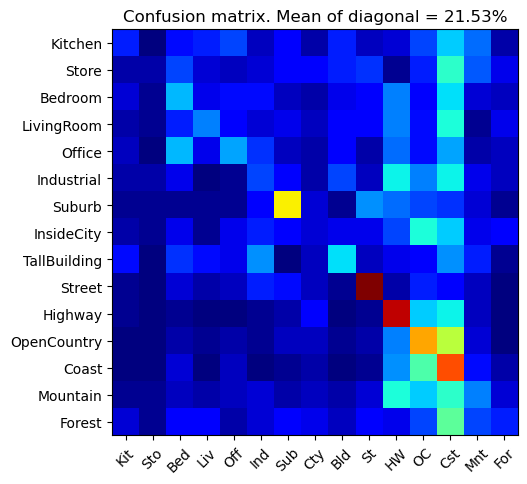

In [4]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories,figname=f'1-NN Classifier with Tiny Image Features')

## Section 2: Bag of SIFT features with Nearest Neighbor classifier

### Section 2a: Represent each image with the Bag of SIFT feature

To create a new vocabulary, make sure `vocab_filename` is different than the old vocabulary, or delete the old one.

In [5]:
print('Using the BAG-OF-SIFT representation for images')

vocab_size = 200  # Larger values will work better (to a point) but be slower to compute
print('Computing the visual word vocabulary of size %d' % vocab_size)
vocab_filename = f'vocab_{vocab_size}.pkl'
if not osp.isfile(vocab_filename):
    # Construct the vocabulary
    print('No existing visual word vocabulary found. Computing one from training images')
    vocab = sc.build_vocabulary(train_image_paths, vocab_size)
    with open(vocab_filename, 'wb') as f:
        pickle.dump(vocab, f)
        print('{:s} saved'.format(vocab_filename))

train_image_feats = sc.get_bags_of_sifts(train_image_paths, vocab_filename)
test_image_feats = sc.get_bags_of_sifts(test_image_paths, vocab_filename)

Using the BAG-OF-SIFT representation for images
Computing the visual word vocabulary of size 200
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 39.97 seconds. Features shape: (1500, 200)
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 40.42 seconds. Features shape: (1500, 200)


### Section 2b: Classify each test image by training and using the Nearest Neighbor classifier

In [6]:
print('Using NEAREST NEIGHBOR classifier to predict test set categories')
predicted_categories = sc.nearest_neighbor_classify(train_image_feats, train_labels, test_image_feats)

Using NEAREST NEIGHBOR classifier to predict test set categories
Classifying using 1-Nearest Neighbor(s) with metric: euclidean...


### Section 2c: Build a confusion matrix and score the recognition system

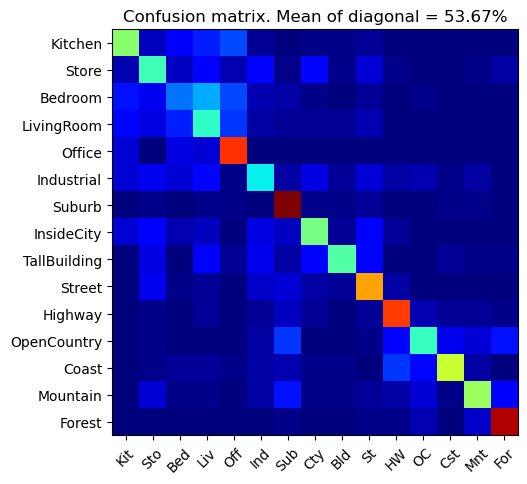

In [7]:
figname = f'{vocab_filename} + 1NN.png'
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories,figname=figname)

## Section 3: Bag of SIFT features and SVM classifier
We will reuse the bag of SIFT features from Section 2a.

The difference is that this time we will classify them with a support vector machine (SVM).

### Section 3a: Classify each test image by training and using the SVM classifiers

In [8]:
print('Using SVM classifier to predict test set categories')
predicted_categories = sc.svm_classify(train_image_feats, train_labels, test_image_feats)

Using SVM classifier to predict test set categories
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Section 3b: Build a confusion matrix and score the recognition system

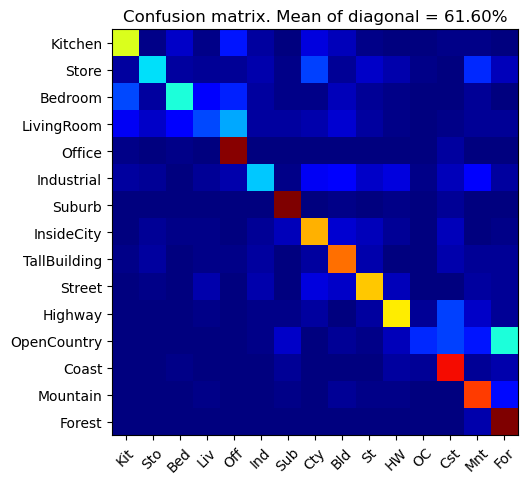

In [9]:
show_results(train_image_paths, test_image_paths, train_labels, test_labels, categories, abbr_categories,
             predicted_categories,figname=f'{vocab_filename} + SVM.png')

## Cross Validation

In [10]:
from crossvalidation import run_cross_validation
DATA_PATH = osp.join('..', 'data') 
CATEGORIES = ['Kitchen', 'Store', 'Bedroom', 'LivingRoom', 'Office', 
                'Industrial', 'Suburb', 'InsideCity', 'TallBuilding', 
                'Street', 'Highway', 'OpenCountry', 'Coast', 'Mountain', 'Forest']
NUM_CV_ITERATIONS = 3 

print("Starting cross-validation experiments...")
print(f"Data path: {osp.abspath(DATA_PATH)}")
print(f"Num iterations: {NUM_CV_ITERATIONS}")

Starting cross-validation experiments...
Data path: /home/stu_12310401/SUSTech-CV/Assignment3/Assignment3_code/data
Num iterations: 3


In [11]:
print("\n\n===== EXPERIMENT 1: Tiny Images + 1-NN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='tiny_image', classifier_type='knn', k_for_knn=1, metric_for_knn='euclidean'
)



===== EXPERIMENT 1: Tiny Images + 1-NN =====
Finished collecting and shuffling all image paths for each category.

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=1, metric='euclidean')...
Classifying using 1-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 20.47%
  Iteration 1 completed in 3.77 seconds.

--- Cross-Validation Iteration 2/3 ---
  Iter 2: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=1, metric='euclidean')...
Classifying using 1-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 2: 22.07%
  Iteration 2 completed in 3.97 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=1, metric

(0.2128888888888889,
 0.006539528430916522,
 [0.20466666666666666, 0.22066666666666668, 0.21333333333333335])

In [12]:
print("\n\n===== EXPERIMENT 2: Tiny Images + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='tiny_image', classifier_type='knn', k_for_knn=3, metric_for_knn='euclidean'
)



===== EXPERIMENT 2: Tiny Images + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=3, metric='euclidean')...
Classifying using 3-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 24.00%
  Iteration 1 completed in 3.99 seconds.

--- Cross-Validation Iteration 2/3 ---
  Iter 2: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=3, metric='euclidean')...
Classifying using 3-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 2: 21.87%
  Iteration 2 completed in 3.97 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=3, metric=

(0.2253333333333333,
 0.010385174618264817,
 [0.24, 0.21866666666666668, 0.21733333333333332])

In [12]:
print("\n\n===== EXPERIMENT 2: Tiny Images + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='tiny_image', classifier_type='knn', k_for_knn=5, metric_for_knn='euclidean'
)



===== EXPERIMENT 2: Tiny Images + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=5, metric='euclidean')...
Classifying using 5-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 23.60%
  Iteration 1 completed in 3.60 seconds.

--- Cross-Validation Iteration 2/3 ---
  Iter 2: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=5, metric='euclidean')...
Classifying using 5-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 2: 23.53%
  Iteration 2 completed in 3.52 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=5, metric=

(0.23377777777777778, 0.002685121327465453, [0.236, 0.23533333333333334, 0.23])

In [13]:
print("\n\n===== EXPERIMENT 2: Tiny Images + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='tiny_image', classifier_type='knn', k_for_knn=7, metric_for_knn='euclidean'
)



===== EXPERIMENT 2: Tiny Images + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=7, metric='euclidean')...
Classifying using 7-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 21.53%
  Iteration 1 completed in 3.68 seconds.

--- Cross-Validation Iteration 2/3 ---
  Iter 2: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=7, metric='euclidean')...
Classifying using 7-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 2: 21.33%
  Iteration 2 completed in 3.58 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=7, metric=

(0.21711111111111112,
 0.004012326685615067,
 [0.21533333333333332, 0.21333333333333335, 0.22266666666666668])

In [14]:
print("\n\n===== EXPERIMENT 1: Tiny Images + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='tiny_image', classifier_type='knn', k_for_knn=9, metric_for_knn='euclidean'
)



===== EXPERIMENT 2: Tiny Images + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=9, metric='euclidean')...
Classifying using 9-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 20.40%
  Iteration 1 completed in 3.50 seconds.

--- Cross-Validation Iteration 2/3 ---
  Iter 2: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=9, metric='euclidean')...
Classifying using 9-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 2: 21.27%
  Iteration 2 completed in 3.52 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting Tiny Image features...
Getting tiny images...
Getting tiny images...
  Running K-NN (k=9, metric=

(0.20955555555555552,
 0.0039377878103709725,
 [0.204, 0.21266666666666667, 0.212])

In [13]:
print("\n\n===== EXPERIMENT 2: Bag of SIFT + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='knn',
    vocab_size_for_sift=10,      # This determines the filename e.g. vocab_100.pkl
    sift_step_vocab=10,           # SIFT params for vocab build
    sift_fast_vocab=True,
    sift_step_features=5,         # SIFT params for feature extraction
    sift_fast_features=True,
    k_for_knn=3,
    metric_for_knn='euclidean',
    force_vocab_rebuild=False     # Set to True to rebuild vocab_100.pkl if it exists
)



===== EXPERIMENT 2: Bag of SIFT + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 10) ---
Target vocabulary file: vocab_10.pkl
Using existing vocabulary file: vocab_10.pkl
Successfully loaded existing vocabulary. Size: 10

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_10.pkl
Loading vocabulary from vocab_10.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 10)...
BoS feature extraction took 16.74 seconds. Features shape: (1500, 10)
Loading vocabulary from vocab_10.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 10)...
BoS feature extraction took 16.52 seconds. Features shape: (1500, 10)
  Running K-NN (k=3, metric='euclidean')...
Classifying using 3-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 44.07%
  Iteration 1 completed in 33.44 seconds.

--- Cross-Valida

(0.4288888888888889,
 0.008543281238551578,
 [0.44066666666666665, 0.42533333333333334, 0.4206666666666667])

In [14]:
print("\n\n===== EXPERIMENT 2: Bag of SIFT + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='knn',
    vocab_size_for_sift=50,      
    sift_step_vocab=10,           
    sift_fast_vocab=True,
    sift_step_features=5,         
    sift_fast_features=True,
    k_for_knn=3,
    metric_for_knn='euclidean',
    force_vocab_rebuild=False     
)



===== EXPERIMENT 2: Bag of SIFT + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 50) ---
Target vocabulary file: vocab_50.pkl
Using existing vocabulary file: vocab_50.pkl
Successfully loaded existing vocabulary. Size: 50

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_50.pkl
Loading vocabulary from vocab_50.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 50)...
BoS feature extraction took 21.75 seconds. Features shape: (1500, 50)
Loading vocabulary from vocab_50.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 50)...
BoS feature extraction took 21.12 seconds. Features shape: (1500, 50)
  Running K-NN (k=3, metric='euclidean')...
Classifying using 3-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 50.93%
  Iteration 1 completed in 43.21 seconds.

--- Cross-Valida

(0.5071111111111111,
 0.002685121327465477,
 [0.5093333333333333, 0.5086666666666667, 0.5033333333333333])

In [16]:
print("\n\n===== EXPERIMENT 2: Bag of SIFT + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='knn',
    vocab_size_for_sift=100,      
    sift_step_vocab=10,          
    sift_fast_vocab=True,
    sift_step_features=5,         
    sift_fast_features=True,
    k_for_knn=3,
    metric_for_knn='euclidean',
    force_vocab_rebuild=False     
)



===== EXPERIMENT 2: Bag of SIFT + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 100) ---
Target vocabulary file: vocab_100.pkl
Using existing vocabulary file: vocab_100.pkl
Successfully loaded existing vocabulary. Size: 100

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_100.pkl
Loading vocabulary from vocab_100.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 100)...
BoS feature extraction took 26.72 seconds. Features shape: (1500, 100)
Loading vocabulary from vocab_100.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 100)...
BoS feature extraction took 26.84 seconds. Features shape: (1500, 100)
  Running K-NN (k=3, metric='euclidean')...
Classifying using 3-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 52.00%
  Iteration 1 completed in 53.77 seconds.

--- C

(0.5266666666666666,
 0.004745368112013893,
 [0.52, 0.5293333333333333, 0.5306666666666666])

In [17]:
print("\n\n===== EXPERIMENT 2: Bag of SIFT + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='knn',
    vocab_size_for_sift=200,     
    sift_step_vocab=10,           
    sift_fast_vocab=True,
    sift_step_features=5,         
    sift_fast_features=True,
    k_for_knn=3,
    metric_for_knn='euclidean',
    force_vocab_rebuild=False     
)



===== EXPERIMENT 2: Bag of SIFT + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 200) ---
Target vocabulary file: vocab_200.pkl
Using existing vocabulary file: vocab_200.pkl
Successfully loaded existing vocabulary. Size: 200

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_200.pkl
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 39.35 seconds. Features shape: (1500, 200)
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 39.12 seconds. Features shape: (1500, 200)
  Running K-NN (k=3, metric='euclidean')...
Classifying using 3-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 53.53%
  Iteration 1 completed in 78.76 seconds.

--- C

(0.5457777777777778, 0.007780951733338511, [0.5353333333333333, 0.554, 0.548])

In [18]:
print("\n\n===== EXPERIMENT 2: Bag of SIFT + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='knn',
    vocab_size_for_sift=1000,     
    sift_step_vocab=10,          
    sift_fast_vocab=True,
    sift_step_features=5,         
    sift_fast_features=True,
    k_for_knn=3,
    metric_for_knn='euclidean',
    force_vocab_rebuild=False     
)



===== EXPERIMENT 2: Bag of SIFT + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 1000) ---
Target vocabulary file: vocab_1000.pkl
Using existing vocabulary file: vocab_1000.pkl
Successfully loaded existing vocabulary. Size: 1000

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_1000.pkl
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 129.30 seconds. Features shape: (1500, 1000)
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 127.67 seconds. Features shape: (1500, 1000)
  Running K-NN (k=3, metric='euclidean')...
Classifying using 3-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 52.27%
  Iteration 1 completed in 257.50 s

(0.5253333333333333,
 0.007323225357015147,
 [0.5226666666666666, 0.5353333333333333, 0.518])

In [19]:
print("\n\n===== EXPERIMENT 2: Bag of SIFT + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='knn',
    vocab_size_for_sift=1000,     
    sift_step_vocab=10,          
    sift_fast_vocab=True,
    sift_step_features=5,         
    sift_fast_features=True,
    k_for_knn=1,
    metric_for_knn='euclidean',
    force_vocab_rebuild=False     
)



===== EXPERIMENT 2: Bag of SIFT + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 1000) ---
Target vocabulary file: vocab_1000.pkl
Using existing vocabulary file: vocab_1000.pkl
Successfully loaded existing vocabulary. Size: 1000

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_1000.pkl
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 124.72 seconds. Features shape: (1500, 1000)
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 125.45 seconds. Features shape: (1500, 1000)
  Running K-NN (k=1, metric='euclidean')...
Classifying using 1-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 50.07%
  Iteration 1 completed in 250.63 s

(0.4988888888888889,
 0.009338622839755846,
 [0.5006666666666667, 0.4866666666666667, 0.5093333333333333])

In [20]:
print("\n\n===== EXPERIMENT 2: Bag of SIFT + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='knn',
    vocab_size_for_sift=1000,     
    sift_step_vocab=10,          
    sift_fast_vocab=True,
    sift_step_features=5,         
    sift_fast_features=True,
    k_for_knn=5,
    metric_for_knn='euclidean',
    force_vocab_rebuild=False     
)



===== EXPERIMENT 2: Bag of SIFT + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 1000) ---
Target vocabulary file: vocab_1000.pkl
Using existing vocabulary file: vocab_1000.pkl
Successfully loaded existing vocabulary. Size: 1000

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_1000.pkl
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 122.99 seconds. Features shape: (1500, 1000)
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 123.39 seconds. Features shape: (1500, 1000)
  Running K-NN (k=5, metric='euclidean')...
Classifying using 5-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 52.67%
  Iteration 1 completed in 246.70 s

(0.5184444444444445,
 0.008152860590152947,
 [0.5266666666666666, 0.5213333333333333, 0.5073333333333333])

In [21]:
print("\n\n===== EXPERIMENT 2: Bag of SIFT + KNN =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='knn',
    vocab_size_for_sift=1000,     
    sift_step_vocab=10,          
    sift_fast_vocab=True,
    sift_step_features=5,         
    sift_fast_features=True,
    k_for_knn=7,
    metric_for_knn='euclidean',
    force_vocab_rebuild=False     
)



===== EXPERIMENT 2: Bag of SIFT + KNN =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 1000) ---
Target vocabulary file: vocab_1000.pkl
Using existing vocabulary file: vocab_1000.pkl
Successfully loaded existing vocabulary. Size: 1000

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_1000.pkl
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 125.86 seconds. Features shape: (1500, 1000)
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 124.08 seconds. Features shape: (1500, 1000)
  Running K-NN (k=7, metric='euclidean')...
Classifying using 7-Nearest Neighbor(s) with metric: euclidean...
  Accuracy for fold 1: 53.20%
  Iteration 1 completed in 250.27 s

(0.5144444444444444, 0.015647348215363517, [0.532, 0.5173333333333333, 0.494])

---

---

In [22]:
print("\n\n===== EXPERIMENT 3: Bag of SIFT + SVM =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='svm',
    vocab_size_for_sift=10,      
    sift_step_vocab=10,           
    sift_fast_vocab=True,
    sift_step_features=5,
    sift_fast_features=True,
    svm_c_value=7.0              
)



===== EXPERIMENT 3: Bag of SIFT + SVM =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 10) ---
Target vocabulary file: vocab_10.pkl
Using existing vocabulary file: vocab_10.pkl
Successfully loaded existing vocabulary. Size: 10

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_10.pkl
Loading vocabulary from vocab_10.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 10)...
BoS feature extraction took 15.16 seconds. Features shape: (1500, 10)
Loading vocabulary from vocab_10.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 10)...
BoS feature extraction took 15.16 seconds. Features shape: (1500, 10)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...
Predicting categories using trained SVMs...
  Accuracy for fold 1: 33.00%
  Iterati

/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


BoS feature extraction took 15.18 seconds. Features shape: (1500, 10)
Loading vocabulary from vocab_10.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 10)...
BoS feature extraction took 15.17 seconds. Features shape: (1500, 10)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...
Predicting categories using trained SVMs...
  Accuracy for fold 2: 36.80%
  Iteration 2 completed in 30.43 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_10.pkl
Loading vocabulary from vocab_10.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 10)...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


BoS feature extraction took 15.16 seconds. Features shape: (1500, 10)
Loading vocabulary from vocab_10.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 10)...
BoS feature extraction took 15.18 seconds. Features shape: (1500, 10)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...
Predicting categories using trained SVMs...
  Accuracy for fold 3: 38.53%
  Iteration 3 completed in 30.42 seconds.


--- Cross-Validation Summary (bag_of_sifts & svm) ---
Num iterations: 3 (Successful folds recorded: 3)
Vocabulary file used/created: vocab_10.pkl (Size: 10)
Mean Accuracy: 36.11%
Std Dev Accuracy: 2.31%
Individual accuracies: ['33.00%', '36.80%', '38.53%']


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.3611111111111111, 0.023108974260187855, [0.33, 0.368, 0.38533333333333336])

In [ ]:
print("\n\n===== EXPERIMENT 3: Bag of SIFT + SVM =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='svm',
    vocab_size_for_sift=50,      
    sift_step_vocab=10,            
    sift_fast_vocab=True,
    sift_step_features=5,
    sift_fast_features=True,
    svm_c_value=7.0               
)



===== EXPERIMENT 3: Bag of SIFT + SVM =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 50) ---
Target vocabulary file: vocab_50.pkl
Using existing vocabulary file: vocab_50.pkl
Successfully loaded existing vocabulary. Size: 50

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_50.pkl
Loading vocabulary from vocab_50.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 50)...
BoS feature extraction took 19.55 seconds. Features shape: (1500, 50)
Loading vocabulary from vocab_50.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 50)...
BoS feature extraction took 19.44 seconds. Features shape: (1500, 50)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 1: 51.53%
  Iteration 1 completed in 39.64 seconds.

--- Cross-Validation Iteration 2/3 ---
  Iter 2: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_50.pkl
Loading vocabulary from vocab_50.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 50)...
BoS feature extraction took 19.44 seconds. Features shape: (1500, 50)
Loading vocabulary from vocab_50.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 50)...
BoS feature extraction took 19.52 seconds. Features shape: (1500, 50)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 2: 54.07%
  Iteration 2 completed in 39.57 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_50.pkl
Loading vocabulary from vocab_50.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 50)...
BoS feature extraction took 19.46 seconds. Features shape: (1500, 50)
Loading vocabulary from vocab_50.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 50)...
BoS feature extraction took 19.42 seconds. Features shape: (1500, 50)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 3: 50.67%
  Iteration 3 completed in 39.47 seconds.


--- Cross-Validation Summary (bag_of_sifts & svm) ---
Num iterations: 3 (Successful folds recorded: 3)
Vocabulary file used/created: vocab_50.pkl (Size: 50)
Mean Accuracy: 52.09%
Std Dev Accuracy: 1.44%
Individual accuracies: ['51.53%', '54.07%', '50.67%']


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.520888888888889,
 0.014425628770771066,
 [0.5153333333333333, 0.5406666666666666, 0.5066666666666667])

In [ ]:
print("\n\n===== EXPERIMENT 3: Bag of SIFT + SVM =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='svm',
    vocab_size_for_sift=100,     
    sift_step_vocab=10,            
    sift_fast_vocab=True,
    sift_step_features=5,
    sift_fast_features=True,
    svm_c_value=7.0               
)



===== EXPERIMENT 3: Bag of SIFT + SVM =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 100) ---
Target vocabulary file: vocab_100.pkl
Using existing vocabulary file: vocab_100.pkl
Successfully loaded existing vocabulary. Size: 100

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_100.pkl
Loading vocabulary from vocab_100.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 100)...
BoS feature extraction took 24.92 seconds. Features shape: (1500, 100)
Loading vocabulary from vocab_100.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 100)...
BoS feature extraction took 24.83 seconds. Features shape: (1500, 100)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 1: 57.00%
  Iteration 1 completed in 50.66 seconds.

--- Cross-Validation Iteration 2/3 ---
  Iter 2: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_100.pkl
Loading vocabulary from vocab_100.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 100)...
BoS feature extraction took 24.83 seconds. Features shape: (1500, 100)
Loading vocabulary from vocab_100.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 100)...
BoS feature extraction took 24.83 seconds. Features shape: (1500, 100)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 2: 55.73%
  Iteration 2 completed in 50.52 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_100.pkl
Loading vocabulary from vocab_100.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 100)...
BoS feature extraction took 24.77 seconds. Features shape: (1500, 100)
Loading vocabulary from vocab_100.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 100)...
BoS feature extraction took 24.78 seconds. Features shape: (1500, 100)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 3: 57.33%
  Iteration 3 completed in 50.44 seconds.


--- Cross-Validation Summary (bag_of_sifts & svm) ---
Num iterations: 3 (Successful folds recorded: 3)
Vocabulary file used/created: vocab_100.pkl (Size: 100)
Mean Accuracy: 56.69%
Std Dev Accuracy: 0.69%
Individual accuracies: ['57.00%', '55.73%', '57.33%']


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.5668888888888889,
 0.006892472186342583,
 [0.57, 0.5573333333333333, 0.5733333333333334])

In [25]:
print("\n\n===== EXPERIMENT 3: Bag of SIFT + SVM =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='svm',
    vocab_size_for_sift=200,     
    sift_step_vocab=10,            
    sift_fast_vocab=True,
    sift_step_features=5,
    sift_fast_features=True,
    svm_c_value=7.0              
)



===== EXPERIMENT 3: Bag of SIFT + SVM =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 200) ---
Target vocabulary file: vocab_200.pkl
Using existing vocabulary file: vocab_200.pkl
Successfully loaded existing vocabulary. Size: 200

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_200.pkl
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 35.56 seconds. Features shape: (1500, 200)
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 35.56 seconds. Features shape: (1500, 200)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 1: 59.07%
  Iteration 1 completed in 72.61 seconds.

--- Cross-Validation Iteration 2/3 ---
  Iter 2: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_200.pkl
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 35.39 seconds. Features shape: (1500, 200)
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 35.50 seconds. Features shape: (1500, 200)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 2: 58.20%
  Iteration 2 completed in 72.51 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_200.pkl
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 35.36 seconds. Features shape: (1500, 200)
Loading vocabulary from vocab_200.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 200)...
BoS feature extraction took 35.61 seconds. Features shape: (1500, 200)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 3: 56.80%
  Iteration 3 completed in 72.42 seconds.


--- Cross-Validation Summary (bag_of_sifts & svm) ---
Num iterations: 3 (Successful folds recorded: 3)
Vocabulary file used/created: vocab_200.pkl (Size: 200)
Mean Accuracy: 58.02%
Std Dev Accuracy: 0.93%
Individual accuracies: ['59.07%', '58.20%', '56.80%']


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.5802222222222223, 0.009338622839755886, [0.5906666666666667, 0.582, 0.568])

In [ ]:
print("\n\n===== EXPERIMENT 3: Bag of SIFT + SVM =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=NUM_CV_ITERATIONS,
    feature_type='bag_of_sifts', classifier_type='svm',
    vocab_size_for_sift=1000,      
    sift_step_vocab=8,            
    sift_fast_vocab=True,
    sift_step_features=4,
    sift_fast_features=True,
    svm_c_value=7.0            
)



===== EXPERIMENT 3: Bag of SIFT + SVM =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 1000) ---
Target vocabulary file: vocab_1000.pkl
Using existing vocabulary file: vocab_1000.pkl
Successfully loaded existing vocabulary. Size: 1000

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_1000.pkl
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 121.08 seconds. Features shape: (1500, 1000)
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 120.40 seconds. Features shape: (1500, 1000)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 1: 62.07%
  Iteration 1 completed in 248.60 seconds.

--- Cross-Validation Iteration 2/3 ---
  Iter 2: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_1000.pkl
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 121.25 seconds. Features shape: (1500, 1000)
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 120.77 seconds. Features shape: (1500, 1000)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 2: 63.60%
  Iteration 2 completed in 249.00 seconds.

--- Cross-Validation Iteration 3/3 ---
  Iter 3: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_1000.pkl
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 120.85 seconds. Features shape: (1500, 1000)
Loading vocabulary from vocab_1000.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 1000)...
BoS feature extraction took 120.99 seconds. Features shape: (1500, 1000)
  Running SVM (C=7.0)...
Training and classifying with 1-vs-all Linear SVMs (C=7.0)...
Training 15 1-vs-all SVMs...


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Predicting categories using trained SVMs...
  Accuracy for fold 3: 62.40%
  Iteration 3 completed in 248.94 seconds.


--- Cross-Validation Summary (bag_of_sifts & svm) ---
Num iterations: 3 (Successful folds recorded: 3)
Vocabulary file used/created: vocab_1000.pkl (Size: 1000)
Mean Accuracy: 62.69%
Std Dev Accuracy: 0.66%
Individual accuracies: ['62.07%', '63.60%', '62.40%']


/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.6268888888888889, 0.006584681062235129, [0.6206666666666667, 0.636, 0.624])

## Fast SIFT

In [27]:
print("\n\n===== EXPERIMENT 4: Bag of SIFT + SVM (Not use Fast SIFT) =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=1,
    feature_type='bag_of_sifts', classifier_type='svm',
    vocab_size_for_sift=10,      
    sift_step_vocab=10,           
    sift_fast_vocab=False,
    sift_step_features=5,
    sift_fast_features=False,
    svm_c_value=7.0,
    force_vocab_rebuild=True
)



===== EXPERIMENT 4: Bag of SIFT + SVM (Not use Fast SIFT) =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 10) ---
Target vocabulary file: vocab_10.pkl
Forcing rebuild of existing vocabulary file: vocab_10.pkl
Building vocabulary using 1500 images, target size 10, saving to vocab_10.pkl
Building vocabulary of size 10 (SIFT step: 10, fast: False)...
Total SIFT descriptors sampled: 967855
Clustering 967855 descriptors into 10 clusters...
Vocabulary building took 145.64 seconds. Vocab shape: (10, 128)
--- Vocabulary built in 145.65s and saved. Actual size: 10 (Target: 10) ---

--- Cross-Validation Iteration 1/3 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_10.pkl
Loading vocabulary from vocab_10.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: False, vocab size: 10)...
BoS feature extraction took 143.35 seconds. Features shape: (1500, 10)
Loading vocabulary fro

/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KeyboardInterrupt: 

In [28]:
print("\n\n===== EXPERIMENT 4: Bag of SIFT + SVM (Not use Fast SIFT) =====")
run_cross_validation(
    data_path=DATA_PATH, categories=CATEGORIES, num_iterations=1,
    feature_type='bag_of_sifts', classifier_type='svm',
    vocab_size_for_sift=10,      
    sift_step_vocab=10,           
    sift_fast_vocab=True,
    sift_step_features=5,
    sift_fast_features=True,
    svm_c_value=7.0,
    force_vocab_rebuild=True
)



===== EXPERIMENT 4: Bag of SIFT + SVM (Not use Fast SIFT) =====
Finished collecting and shuffling all image paths for each category.

--- Vocabulary Handling for Bag of SIFT (Size: 10) ---
Target vocabulary file: vocab_10.pkl
Forcing rebuild of existing vocabulary file: vocab_10.pkl
Building vocabulary using 1500 images, target size 10, saving to vocab_10.pkl
Building vocabulary of size 10 (SIFT step: 10, fast: True)...
Total SIFT descriptors sampled: 966762
Clustering 966762 descriptors into 10 clusters...
Vocabulary building took 18.04 seconds. Vocab shape: (10, 128)
--- Vocabulary built in 18.04s and saved. Actual size: 10 (Target: 10) ---

--- Cross-Validation Iteration 1/1 ---
  Iter 1: 1500 train imgs, 1500 test imgs.
  Extracting BoS features using shared vocab: vocab_10.pkl
Loading vocabulary from vocab_10.pkl...
Getting Bags of SIFTs (SIFT step: 5, fast: True, vocab size: 10)...
BoS feature extraction took 15.78 seconds. Features shape: (1500, 10)
Loading vocabulary from voc

/home/stu_12310401/miniconda3/envs/assignment3/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(0.32133333333333336, 0.0, [0.32133333333333336])